# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [1]:
GROUP_NO = 9 # group number
GROUP_MEMBERS = {
    459114: "Yu-Ting Huang", # mat. no. : name,
    460730: "Chieh-Ting Lin",
}

---

In [2]:
# required imports
# do not edit!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

/var/folders/j7/248_nty55ss6mnll47gflrz80000gn/T/ipykernel_7345/1748673763.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Question 1: Preprocessing and Visualization (19 Points)

**About the Data: Heart Disease**

In this task, our data (`q1_heart_disease.csv`) contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. See below a short description for each column.

| Column         | Description                                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Age            | The age of the patient in years.                                                                                                  |
| Sex            | The sex of the patient.                                                                                                           |
| ChestPainType  | The type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomnic).                       |
| RestingBP      | The resting blood pressure in millimeter of mercury [mmHg].                                                                       |
| Cholesterol    | The cholesterol of the blood serum in milligrams per deciliter (mg/dl).                                                           |
| FastingBS      | 1 if the blood sugar while fasting is above 120 mg/dl, 0 otherwise.                                                               |
| RestingECG     | Results of the electrocardiogram when resting.                                                                                    |
| MaxHR          | The maximum heart rate achieved while exercising.                                                                                 |
| ExerciseAngina | If an Angina (pressure on chest) is inducible by exercising.                                                                      |
| Oldpeak        | Numerical measure of the depression of the ST segment of electrocardiogram induced by exercise relative to rest.                  |
| ST_Slope       | The slope of the peak exercise ST segment, where 0 corresponds to downsloping; 1 to a flat level, and 2 corresponds to upsloping. |
| HeartDisease   | Heart disease being present or not.                                                                                               |

## Part I: Preprocessing (11 pts)

### a)
First things first. Import the file **q1_heart_disease.csv** and save it into a dataframe named `heart_df`. Visualize the dataframe by showing the first five lines. 


In [3]:
# Import and visualization.
# YOUR CODE HERE

heart_df = pd.read_csv("./datasets/q1_heart_disease.csv")

heart_df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  40.0   M           ATA      140.0        289.0        0.0     Normal   
1  49.0   F           NAP      160.0        180.0        0.0     Normal   
2  37.0   M           ATA      130.0        283.0        0.0         ST   
3  48.0   F           ASY      138.0        214.0        0.0     Normal   
4  54.0   M           NAP      150.0        195.0        0.0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0  172.0              N      0.0       Up           0.0  
1  156.0              N      1.0     Flat           1.0  
2   98.0              N      0.0       Up           0.0  
3  108.0              Y      1.5     Flat           1.0  
4  122.0              N      0.0       Up           0.0

### b) 
i. Check the data types. Are there any data type problems (e.g., numerical columns having a non-numerical data type)?

In [4]:
# Visualizing data types
# YOUR CODE HERE

print(heart_df.dtypes)

for idx, elem in enumerate(heart_df):
    if heart_df['Age'].dtypes != float:
        print(heart_df['Age'][idx])
        
    elif heart_df['Sex'].dtypes != object:
        print(heart_df['Sex'][idx])
        
    elif heart_df['ChestPainType'].dtypes != object:
        print(heart_df['ChestPainType'][idx])
        
    elif heart_df['RestingBP'].dtypes != float:
        print(heart_df['RestingBP'][idx])
        
    elif heart_df['Cholesterol'].dtypes != float:
        print(heart_df['Cholesterol'][idx])
        
    elif heart_df['FastingBS'].dtypes != float:
        print(heart_df['FastingBS'][idx])
        
    elif heart_df['RestingECG'].dtypes != object:
        print(heart_df['RestingECG'][idx])
        
    elif heart_df['MaxHR'].dtypes != float:
        print(heart_df['MaxHR'][idx])
        
    elif heart_df['ExerciseAngina'].dtypes != object:
        print(heart_df['ExerciseAngina'][idx])
        
    elif heart_df['Oldpeak'].dtypes != float:
        print(heart_df['Oldpeak'][idx])
        
    elif heart_df['ST_Slope'].dtypes != object:
        print(heart_df['ST_Slope'][idx])
        
    elif heart_df['HeartDisease'].dtypes != float:
        print(heart_df['HeartDisease'][idx])
        
#Answer: No, There aren't any data type problems
# However, some columns are indeed intended to represent categorical or binary data rather than continuous numerical data.
# For example, "FastingBS" and "HeartDisease" should represent binary outcomes.
# They should be integers (0 or 1) or boolean values to accurately represent the binary nature of the data.

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object


ii. Fix problems, if there are any data type problems. Further, improve categorical columns by setting them to the categorical type and translate boolean columns to boolean values.

In [5]:
# Fixing problems, if necessary
# YOUR CODE HERE

In [6]:
# Set categorical columns to categorial type.
# YOUR CODE HERE

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_columns:
    heart_df[col] = heart_df[col].astype('category')

In [7]:
# Translate boolean columns to boolean type
# YOUR CODE HERE

binary_columns = ['FastingBS', 'HeartDisease']

for col in binary_columns:
    heart_df[col] = heart_df[col].astype('bool')

In [8]:
# Checking again by visualizing data types
# YOUR CODE HERE

heart_df.dtypes

Age                float64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS             bool
RestingECG        category
MaxHR              float64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease          bool
dtype: object

### c)
i. In this subtask, we start with a first evaluation of our data by checking the plausibility of some entries. To make sure that we do not have a clash between intended NaN values and existing NaN values in the dataset, we first remove all NaN values. Report the number of rows containing a NaN value.

In [9]:
# YOUR CODE HERE

nan_rows_count = heart_df.isnull().any(axis=1).sum()
heart_df_noNaN = heart_df.dropna()

print("The number of rows containing a NaN value: ", nan_rows_count)

The number of rows containing a NaN value:  2


ii. To check plausibility, create boxplots for all numerical features. Reason which features have invalid or missing values. Show and report such outliers. 

The following are the outliers in Age
7.0
6.0
3.0
388.0
The following are the outliers in RestingBP
170.0
190.0
180.0
170.0
180.0
180.0
170.0
170.0
200.0
180.0
180.0
170.0
180.0
80.0
200.0
185.0
170.0
200.0
180.0
180.0
170.0
178.0
170.0
170.0
170.0
172.0
180.0
190.0
170.0
174.0
178.0
180.0
200.0
192.0
178.0
180.0
170.0
180.0
172.0
170.0
170.0
The following are the outliers in Cholesterol
468.0
518.0
412.0
529.0
466.0
603.0
491.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

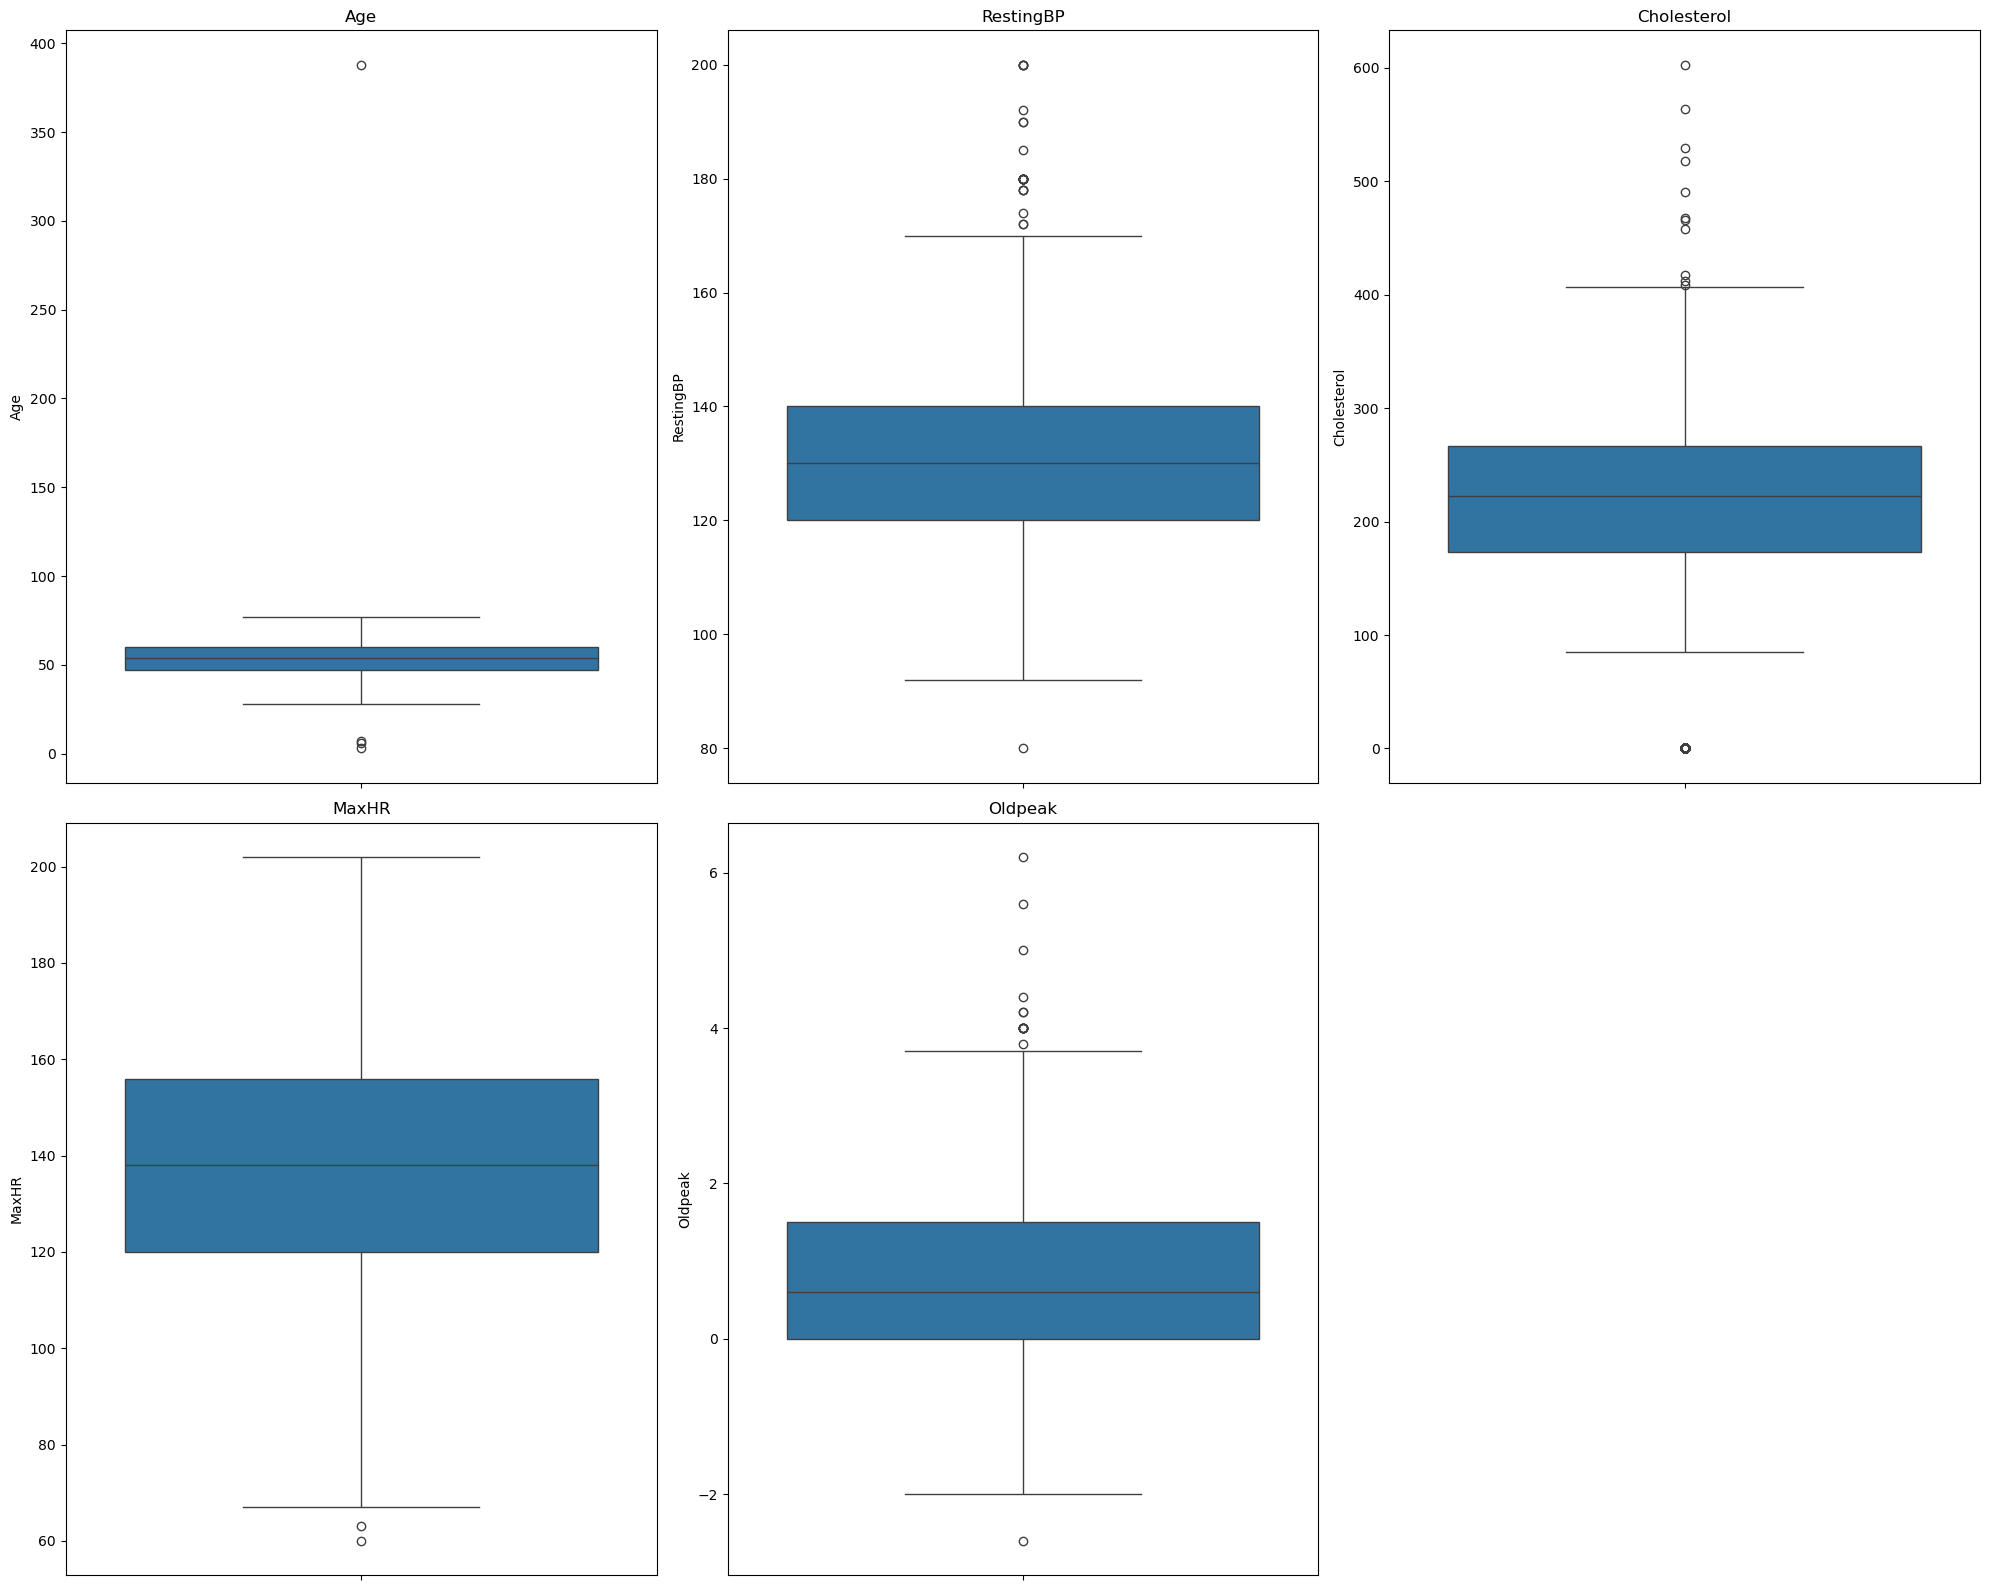

In [10]:
# Creating the boxplot and calculating outliers
# YOUR CODE HERE

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(20, 16))
for i, feature in enumerate(numerical_features, 1):
    q1 = np.quantile(heart_df_noNaN[feature], 0.25)
    q3 = np.quantile(heart_df_noNaN[feature], 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    print('The following are the outliers in', feature)
    for outliers in heart_df_noNaN[feature][(heart_df_noNaN[feature] <= lower_bound) | (heart_df_noNaN[feature] >= upper_bound)]: print(outliers)
    
    plt.subplot(2, 3, i)
    sns.boxplot(y = heart_df_noNaN[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

_Note: There may be more cells than what you may need for viewing and reporting the entries properly and nicely._

In [11]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE

def calculate_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

outliers_dict = {}
for feature in numerical_features:
    outliers_dict[feature] = calculate_outliers(heart_df_noNaN, feature)

outliers_dict['Age']

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
8      7.0   F           ATA      145.0        207.0       True     Normal   
92     6.0   M           ASY      140.0        139.0      False     Normal   
339    3.0   M           ASY       95.0          0.0       True     Normal   
597  388.0   M           ASY      160.0        256.0       True         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
8    130.0              N      1.5     Flat          True  
92   140.0              N      0.0       Up         False  
339  145.0              N      1.1     Down          True  
597  136.0              N      0.2       Up         False

In [12]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE

outliers_dict['RestingBP']

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
111  39.0   M           ATA      190.0        241.0      False     Normal   
125  58.0   F           ATA      180.0        393.0      False     Normal   
191  53.0   M           ASY      180.0        285.0      False         ST   
192  46.0   M           ASY      180.0        280.0      False         ST   
243  54.0   M           ASY      200.0        198.0      False     Normal   
276  45.0   F           ATA      180.0        295.0      False     Normal   
277  59.0   M           NAP      180.0        213.0      False     Normal   
280  57.0   F           ASY      180.0        347.0      False         ST   
316  53.0   M           ASY       80.0          0.0      False     Normal   
368  64.0   F           ASY      200.0          0.0      False     Normal   
375  63.0   M           ASY      185.0          0.0      False     Normal   
402  61.0   M           NAP      200.0          0.0       True         ST   
414  54.0   M           ASY      180.0          0.0       True     Normal   
427  60.0   M           NAP      180.0          0.0      False         ST   
478  59.0   M           ASY      178.0          0.0       True        LVH   
554  55.0   M           ASY      172.0        260.0      False     Normal   
589  57.0   M           ATA      180.0        285.0       True         ST   
596  61.0   M           ASY      190.0        287.0       True        LVH   
678  59.0   F           ASY      174.0        249.0      False     Normal   
707  59.0   M            TA      178.0        270.0      False        LVH   
730  55.0   F           ASY      180.0        327.0      False         ST   
737  56.0   F           ASY      200.0        288.0       True        LVH   
764  54.0   M           ATA      192.0        283.0      False        LVH   
779  66.0   F           ASY      178.0        228.0       True     Normal   
785  64.0   F           ASY      180.0        325.0      False     Normal   
860  68.0   M           NAP      180.0        274.0       True        LVH   
885  52.0   M           NAP      172.0        199.0       True     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
111  106.0              N      0.0       Up         False  
125  110.0              Y      1.0     Flat          True  
191  120.0              Y      1.5     Flat          True  
192  120.0              N      0.0       Up         False  
243  142.0              Y      2.0     Flat          True  
276  180.0              N      0.0       Up         False  
277  100.0              N      0.0       Up         False  
280  126.0              Y      0.8     Flat         False  
316  141.0              Y      2.0     Down         False  
368  140.0              Y      1.0     Flat          True  
375   98.0              Y      0.0       Up          True  
402   70.0              N      0.0     Flat          True  
414  150.0              N      1.5     Flat          True  
427  140.0              Y      1.5     Flat         False  
478  120.0              Y      0.0     Flat          True  
554   73.0              N      2.0     Flat          True  
589  120.0              N      0.8     Flat          True  
596  150.0              Y      2.0     Down          True  
678  143.0              Y      0.0     Flat          True  
707  145.0              N      4.2     Down         False  
730  117.0              Y      3.4     Flat          True  
737  133.0              Y      4.0     Down          True  
764  195.0              N      0.0       Up          True  
779  165.0              Y      1.0     Flat          True  
785  154.0              Y      0.0       Up         False  
860  150.0              Y      1.6     Flat          True  
885  162.0              N      0.5       Up         False

In [13]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE

outliers_dict['Cholesterol']

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
29   53.0   F           ATA      113.0        468.0      False     Normal   
31   53.0   M           NAP      145.0        518.0      False     Normal   
70   44.0   M           ASY      150.0        412.0      False     Normal   
77   32.0   M           ASY      118.0        529.0      False     Normal   
105  40.0   M           ASY      120.0        466.0       True     Normal   
..    ...  ..           ...        ...          ...        ...        ...   
539  56.0   M           ASY      130.0          0.0      False        LVH   
540  62.0   M           NAP      133.0          0.0       True         ST   
621  67.0   F           NAP      115.0        564.0      False        LVH   
672  65.0   F           NAP      140.0        417.0       True        LVH   
801  56.0   F           ASY      134.0        409.0      False        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
29   127.0              N      0.0       Up         False  
31   130.0              N      0.0     Flat          True  
70   170.0              N      0.0       Up         False  
77   130.0              N      0.0     Flat          True  
105  152.0              Y      1.0     Flat          True  
..     ...            ...      ...      ...           ...  
539  122.0              Y      1.0     Flat          True  
540  119.0              Y      1.2     Flat          True  
621  160.0              N      1.6     Flat         False  
672  157.0              N      0.8       Up         False  
801  150.0              Y      1.9     Flat          True  

[183 rows x 12 columns]

In [14]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE

outliers_dict['MaxHR']

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
373  60.0   M           ASY      135.0          0.0      False     Normal   
393  51.0   M           ASY      140.0          0.0      False     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
373   63.0              Y      0.5       Up          True  
393   60.0              N      0.0     Flat          True

In [15]:
outliers_dict['Oldpeak']

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
69   52.0   M           ASY      160.0        246.0      False         ST   
168  50.0   M           ASY      140.0        231.0      False         ST   
326  46.0   M           ASY      100.0          0.0       True         ST   
503  65.0   M           ASY      136.0        248.0      False     Normal   
525  61.0   M           ASY      120.0        282.0      False         ST   
541  74.0   M           ASY      150.0        258.0       True         ST   
563  64.0   M           ASY      134.0        273.0      False     Normal   
629  63.0   F           ASY      150.0        407.0      False        LVH   
707  59.0   M            TA      178.0        270.0      False        LVH   
737  56.0   F           ASY      200.0        288.0       True        LVH   
776  55.0   M           ASY      140.0        217.0      False     Normal   
780  38.0   M            TA      120.0        231.0      False     Normal   
796  51.0   M           ASY      140.0        298.0      False     Normal   
855  62.0   F           ASY      160.0        164.0      False        LVH   
905  58.0   M           ASY      114.0        318.0      False         ST   
913  63.0   M           ASY      140.0        187.0      False        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
69    82.0              Y      4.0     Flat          True  
168  140.0              Y      5.0     Flat          True  
326  133.0              N     -2.6     Flat          True  
503  140.0              Y      4.0     Down          True  
525  135.0              Y      4.0     Down          True  
541  130.0              Y      4.0     Down          True  
563  102.0              Y      4.0     Down          True  
629  154.0              N      4.0     Flat          True  
707  145.0              N      4.2     Down         False  
737  133.0              Y      4.0     Down          True  
776  111.0              Y      5.6     Down          True  
780  182.0              Y      3.8     Flat          True  
796  122.0              Y      4.2     Flat          True  
855  145.0              N      6.2     Down          True  
905  140.0              N      4.4     Down          True  
913  144.0              Y      4.0       Up          True

iii. Decide and briefly reason which entries can be kept such that some values can be imputed later and which entries have to be deleted. Apply the preprocessing by either deleting entries or by replacing values that should be imputed by setting their value to NaN respectively. Report for both processings how many entries are effected.

__Student Answer:__ _your answer goes here_

It is not always necessary to remove outliers from a dataframe. For example, individuals who are too young may not have a significant impact on the research. However, in cases where entries contain multiple implausible values across different features, particularly when these values suggest a lack of reliability (such as RestingBP very close to 0 or extremely high without clinical justification, combined with Cholesterol of 0), it is likely that these entries represent errors in data collection or entry that cannot be easily corrected through imputation. Therefore, it is advisable to remove such entries from the dataframe. We believe that if an entry contains more than one incredible outlier, it needs to be deleted. If it contains only one, it can be replaced by NaN. As a result, there are 3 entries should be deleted and 21 entries should be replaced with NaN values.

In [16]:
# Potential removing of outliers, reporting their number, and showing of the resulting dataframe
# YOUR CODE HERE

df_include_all_outlier = pd.concat([outliers_dict['Age'], outliers_dict['RestingBP'], 
                                    outliers_dict['Cholesterol'], outliers_dict['MaxHR'], 
                                    outliers_dict['Oldpeak']]).drop_duplicates()

print("There are %d rows containing outliers." % (len(df_include_all_outlier)))

to_delete = heart_df_noNaN[(heart_df_noNaN['Cholesterol'] == 0) & 
                             ((heart_df_noNaN['RestingBP'] < 50) | 
                              (heart_df_noNaN['RestingBP'] > 180))]

print("There are %d entries should be deleted." % (len(to_delete)))

heart_df_deleted = heart_df_noNaN.drop(to_delete.index)
print(heart_df_deleted)

There are 219 rows containing outliers.
There are 3 entries should be deleted.
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40.0   M           ATA      140.0        289.0      False     Normal   
1    49.0   F           NAP      160.0        180.0      False     Normal   
2    37.0   M           ATA      130.0        283.0      False         ST   
3    48.0   F           ASY      138.0        214.0      False     Normal   
4    54.0   M           NAP      150.0        195.0      False     Normal   
..    ...  ..           ...        ...          ...        ...        ...   
918  45.0   M            TA      110.0        264.0      False     Normal   
919  68.0   M           ASY      144.0        193.0       True     Normal   
920  57.0   M           ASY      130.0        131.0      False     Normal   
921  57.0   F           ATA      130.0        236.0      False        LVH   
922  38.0   M           NAP      138.0        175.0      False     Normal 

In [17]:
# Potential replacing of values with NaN, reporting their number, and showing of the resulting dataframe
# YOUR CODE HERE

# no one will be older than 100 years old
age_toNaN = heart_df_deleted.loc[heart_df_deleted.Age > 100,'Age']
RestingBP_toNaN = heart_df_deleted.loc[heart_df_deleted.RestingBP > 200,'RestingBP']
Cholesterol_toNaN = heart_df_deleted.loc[heart_df_deleted.Cholesterol > 500,'Cholesterol']
MaxHR_toNaN = heart_df_deleted.loc[heart_df_deleted.MaxHR < 80,'MaxHR']
Oldpeak_toNaN = heart_df_deleted.loc[heart_df_deleted.Oldpeak > 4,'Oldpeak']

num_of_NaN = age_toNaN.count() + RestingBP_toNaN.count() + Cholesterol_toNaN.count() + MaxHR_toNaN.count() + Oldpeak_toNaN.count()

# Make sure there are no duplicate rows
assert len(set(age_toNaN.index).union(RestingBP_toNaN.index, Cholesterol_toNaN.index, MaxHR_toNaN.index, Oldpeak_toNaN.index)) == num_of_NaN

print("There are %d entries in the dataframe should be replaced with NaN values." % num_of_NaN)

heart_df_deleted.loc[(heart_df_deleted['Age'] > 100, 'Age')] = np.nan
heart_df_deleted.loc[(heart_df_deleted['RestingBP'] > 200, 'RestingBP')] = np.nan
heart_df_deleted.loc[(heart_df_deleted['Cholesterol'] > 500, 'Cholesterol')] = np.nan
heart_df_deleted.loc[(heart_df_deleted['MaxHR'] < 80, 'MaxHR')] = np.nan
heart_df_deleted.loc[(heart_df_deleted['Oldpeak'] > 4, 'Oldpeak')] = np.nan

print(heart_df_deleted)

There are 21 entries in the dataframe should be replaced with NaN values.
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40.0   M           ATA      140.0        289.0      False     Normal   
1    49.0   F           NAP      160.0        180.0      False     Normal   
2    37.0   M           ATA      130.0        283.0      False         ST   
3    48.0   F           ASY      138.0        214.0      False     Normal   
4    54.0   M           NAP      150.0        195.0      False     Normal   
..    ...  ..           ...        ...          ...        ...        ...   
918  45.0   M            TA      110.0        264.0      False     Normal   
919  68.0   M           ASY      144.0        193.0       True     Normal   
920  57.0   M           ASY      130.0        131.0      False     Normal   
921  57.0   F           ATA      130.0        236.0      False        LVH   
922  38.0   M           NAP      138.0        175.0      False     Normal   

 

iv. To give yourself a better insight, plot the resulting dataframe again using boxplots.

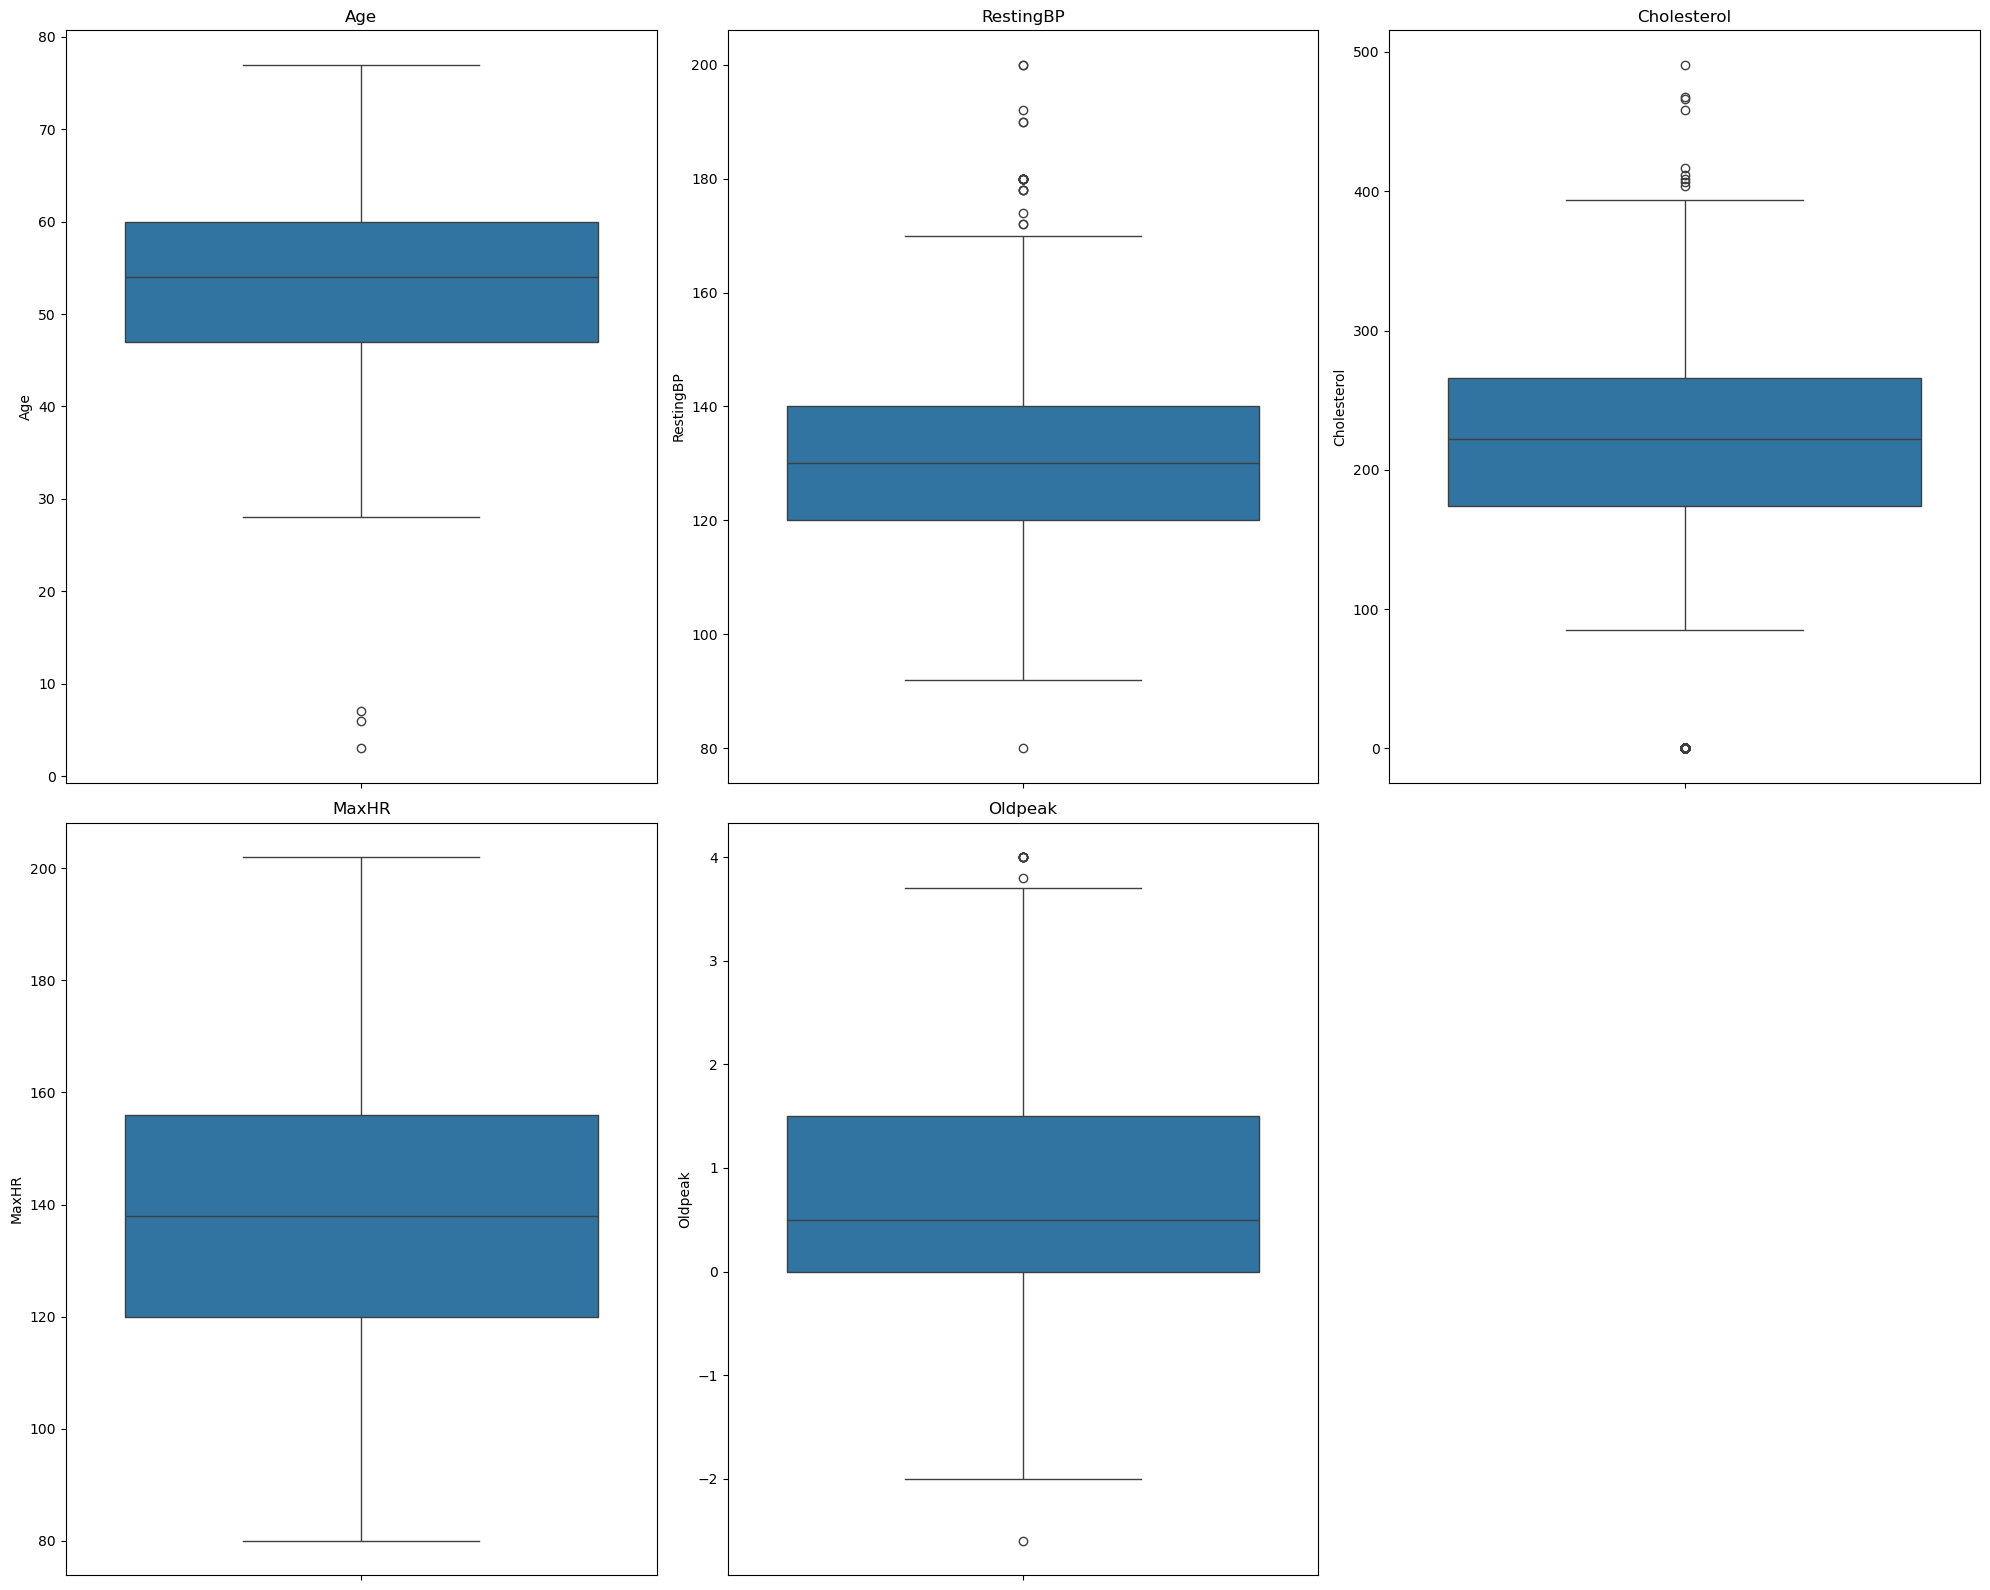

In [18]:
# Creating a boxplot
# YOUR CODE HERE
 
plt.figure(figsize=(20, 16))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y = heart_df_deleted[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

### d)
In this task, we apply one-hot encoding for all categorical and all boolean features. This is used later for visualization. Afterwards, show the resulting dataframe.

In [19]:
# Replacing categorical and boolean features with one-hot encoded columns
# YOUR CODE HERE

one_hot_columns = categorical_columns + binary_columns

for i, feature in enumerate(one_hot_columns, 1):
    heart_df_deleted_one_hot = pd.get_dummies(heart_df_deleted[feature], prefix=feature)
    heart_df_deleted = pd.concat([heart_df_deleted.drop(columns=feature), heart_df_deleted_one_hot], axis = 1)
print(heart_df_deleted)

      Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_F  Sex_M  \
0    40.0      140.0        289.0  172.0      0.0  False   True   
1    49.0      160.0        180.0  156.0      1.0   True  False   
2    37.0      130.0        283.0   98.0      0.0  False   True   
3    48.0      138.0        214.0  108.0      1.5   True  False   
4    54.0      150.0        195.0  122.0      0.0  False   True   
..    ...        ...          ...    ...      ...    ...    ...   
918  45.0      110.0        264.0  132.0      1.2  False   True   
919  68.0      144.0        193.0  141.0      3.4  False   True   
920  57.0      130.0        131.0  115.0      1.2  False   True   
921  57.0      130.0        236.0  174.0      0.0   True  False   
922  38.0      138.0        175.0  173.0      0.0  False   True   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
0                False               True              False  ...   
1                False              False               T

### e)
i. In this task, we want to impute missing values based on their k-nearest neighbor. Therefore, as a first step, create a reduced dataframe that contains the column(s) with missing values and with columns that correlate with the missing value. To decide which features (weakly) correlate, consider the correlation matrix in the figure below that is taken from literature (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/). Consider all features that have an absolute value for the correlation coefficient of at least 0.1 with the missing value.

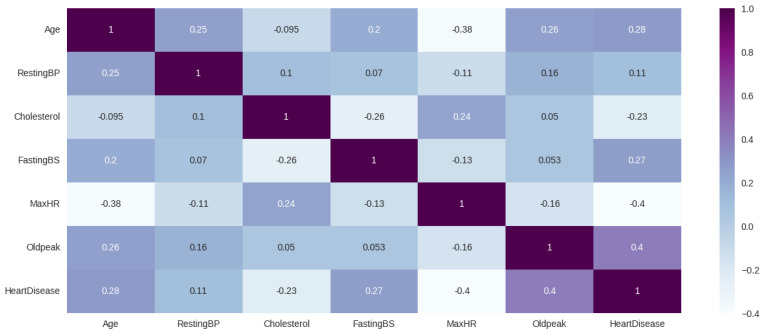

Figure 1: Correlation matrix between different features from Literature. (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/)

In [20]:
# Creating a dataframe with the values to be imputed and the correlating columns
# YOUR CODE HERE

# Create a reduced dataframe that contains the column(s) with missing values
columns_with_missing_values = heart_df_deleted.columns[heart_df_deleted.isna().any()].tolist()
reduced_df = heart_df_deleted[columns_with_missing_values]

# Calculate the correlation matrix
correlation_matrix = heart_df_deleted.corr()
correlation_threshold = 0.1

# Keep track of added columns
added_columns = set(columns_with_missing_values)

for column in columns_with_missing_values:
    correlated_columns = correlation_matrix[abs(correlation_matrix[column]) >= correlation_threshold].index.tolist()
    correlated_columns.remove(column)  # Remove the original column from correlated_columns
    correlated_columns = [col for col in correlated_columns if col not in added_columns]

    # Add the columns to the set of added columns
    added_columns.update(correlated_columns)
    reduced_df = pd.concat([reduced_df, heart_df_deleted[correlated_columns]], axis=1)

# Convert the set of added columns to a list
total_columns_list = list(added_columns)

print(heart_df_deleted[total_columns_list])

     HeartDisease_False  ExerciseAngina_N  ST_Slope_Up  ST_Slope_Down  \
0                  True              True         True          False   
1                 False              True        False          False   
2                  True              True         True          False   
3                 False             False        False          False   
4                  True              True         True          False   
..                  ...               ...          ...            ...   
918               False              True        False          False   
919               False              True        False          False   
920               False             False        False          False   
921               False              True        False          False   
922                True              True         True          False   

     ChestPainType_ASY  RestingBP  ST_Slope_Flat  RestingECG_ST  MaxHR  \
0                False      140.0          False 

__Student Answer:__ _your answer goes here_

ii. Next, use k-nearest neighbor imputation with $k = 5$. Impute the missing values. Update the dataframe `heart_df`.

In [21]:
# Applying k-nearest neighbor imputation
# YOUR CODE HERE

heart_df = heart_df_deleted[total_columns_list]

columns_with_missing_values = heart_df.columns[heart_df.isna().any()].tolist()

# Initialize the KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

In [22]:
# Updating the imputed column(s)
# YOUR CODE HERE

# Perform KNN imputation only for columns with missing values
heart_df.loc[:, columns_with_missing_values] = imputer.fit_transform(heart_df[columns_with_missing_values])

print(heart_df)

     HeartDisease_False  ExerciseAngina_N  ST_Slope_Up  ST_Slope_Down  \
0                  True              True         True          False   
1                 False              True        False          False   
2                  True              True         True          False   
3                 False             False        False          False   
4                  True              True         True          False   
..                  ...               ...          ...            ...   
918               False              True        False          False   
919               False              True        False          False   
920               False             False        False          False   
921               False              True        False          False   
922                True              True         True          False   

     ChestPainType_ASY  RestingBP  ST_Slope_Flat  RestingECG_ST  MaxHR  \
0                False      140.0          False 

## Part II: Advanced Visualization (8 pts)

In this question, we continue using the preprocessed data from Part I.

### a)
In this task, visualize the relation by plotting each pair of numerical features. Visualize the instances in the pairplots of those individuals that have and that do not have heart disease.

/Users/yu-tinghuang/miniconda3/envs/env-ids-ws23/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/Users/yu-tinghuang/miniconda3/envs/env-ids-ws23/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/Users/yu-tinghuang/miniconda3/envs/env-ids-ws23/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/Users/yu-tinghuang/miniconda3/envs/env-ids-ws23/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.

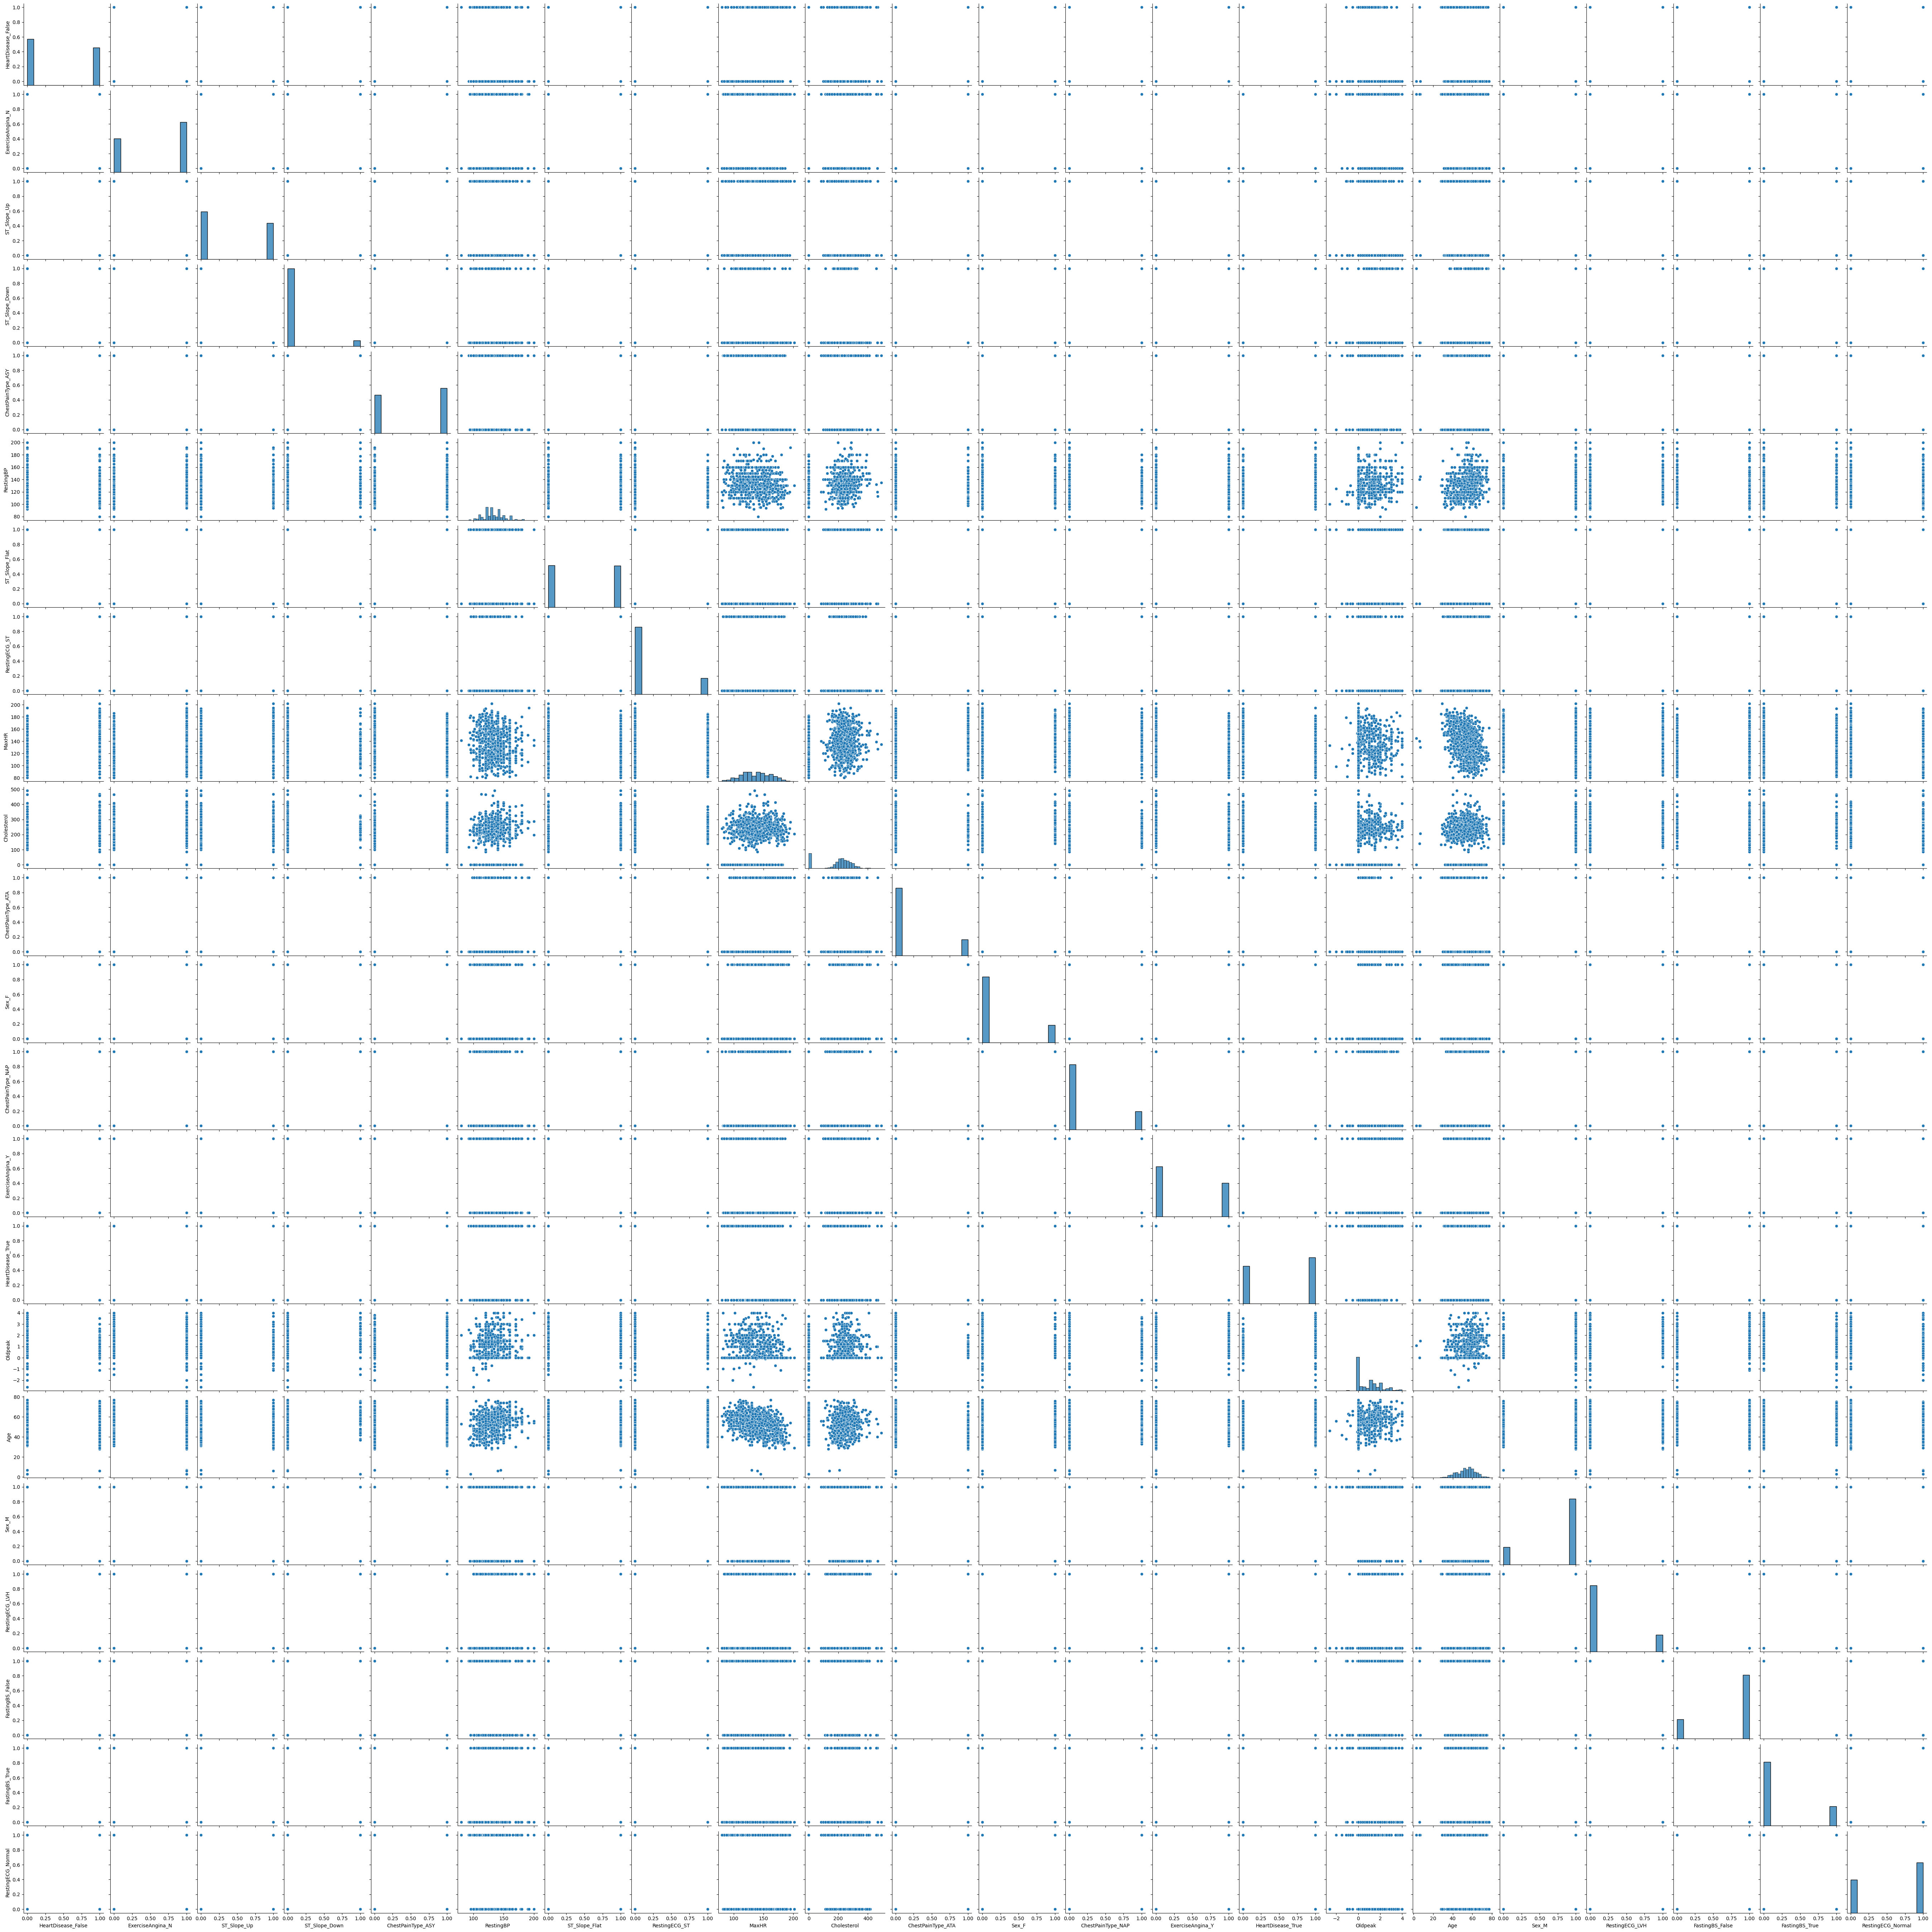

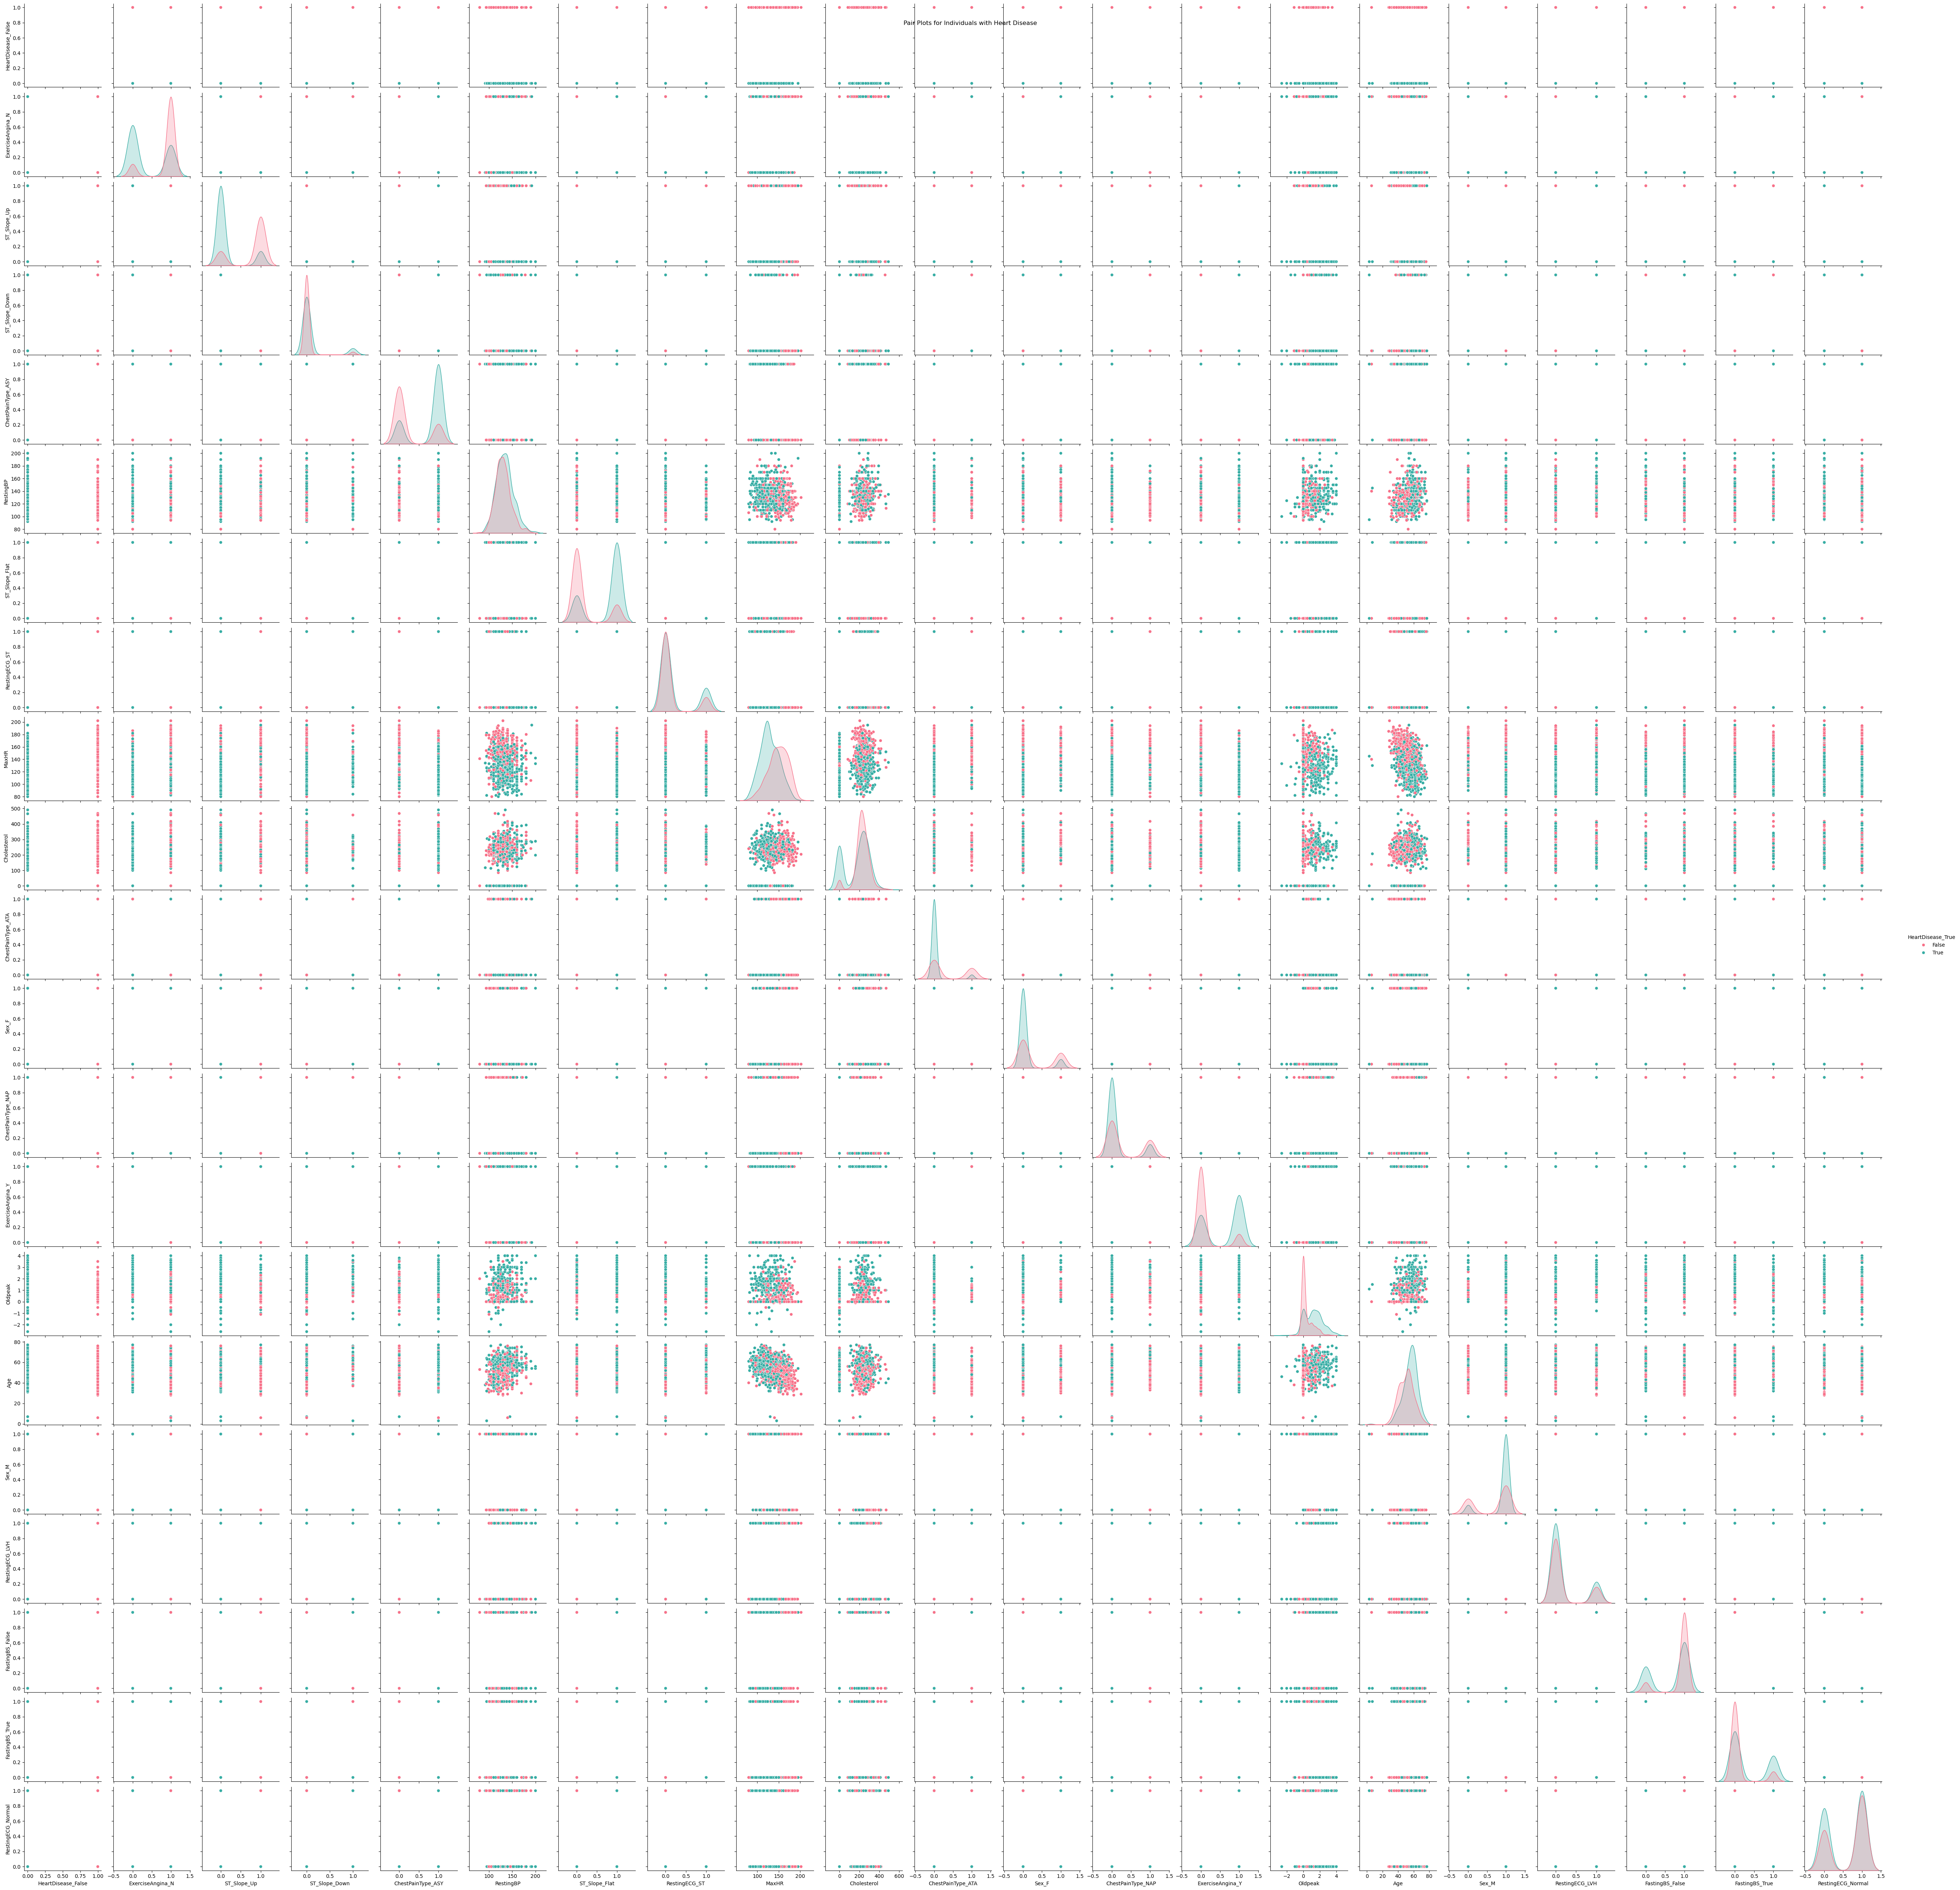

In [23]:
# Visualizing the relation between the numerical values using a pairplot, where the entries are classified by whether a heart disease is present 
# YOUR CODE HERE

sns.pairplot(heart_df)

# Plot pair plots for each group
sns.pairplot(heart_df, hue='HeartDisease_True', markers=['o'], palette='husl', diag_kind='kde')
plt.suptitle("Pair Plots for Individuals with Heart Disease")
plt.show()

# sns.pairplot(heart_df, hue='HeartDisease_False', markers=['s'], palette='husl', diag_kind='kde')
# plt.suptitle("Pair Plots for Individuals without Heart Disease")
# plt.show()

### b)
i. Having the pairplot, we are interested in more details on the relation between the age of a patient and maximum heart rate. Therefore, create plot that shows the regression line between both features.

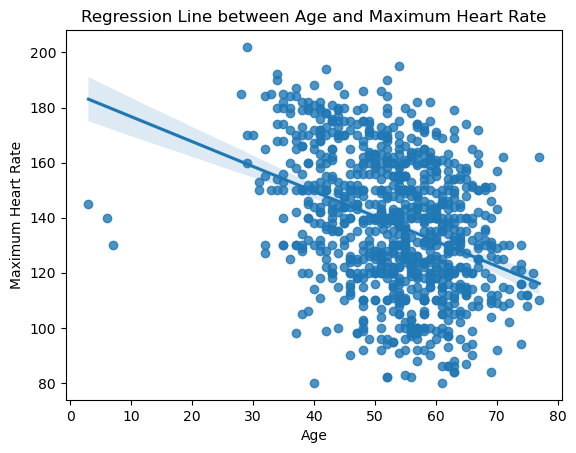

In [24]:
# Plotting age and maximum heart rate with regression line
# YOUR CODE HERE

sns.regplot(x='Age', y='MaxHR', data=heart_df)
plt.title("Regression Line between Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

ii. Given our evaluation from task b-i), we are not sure if Simpson's Paradox occurs or not. Give some short reasoning, and if needed, do some experiment to check whether Simpson's Paradox occurs.

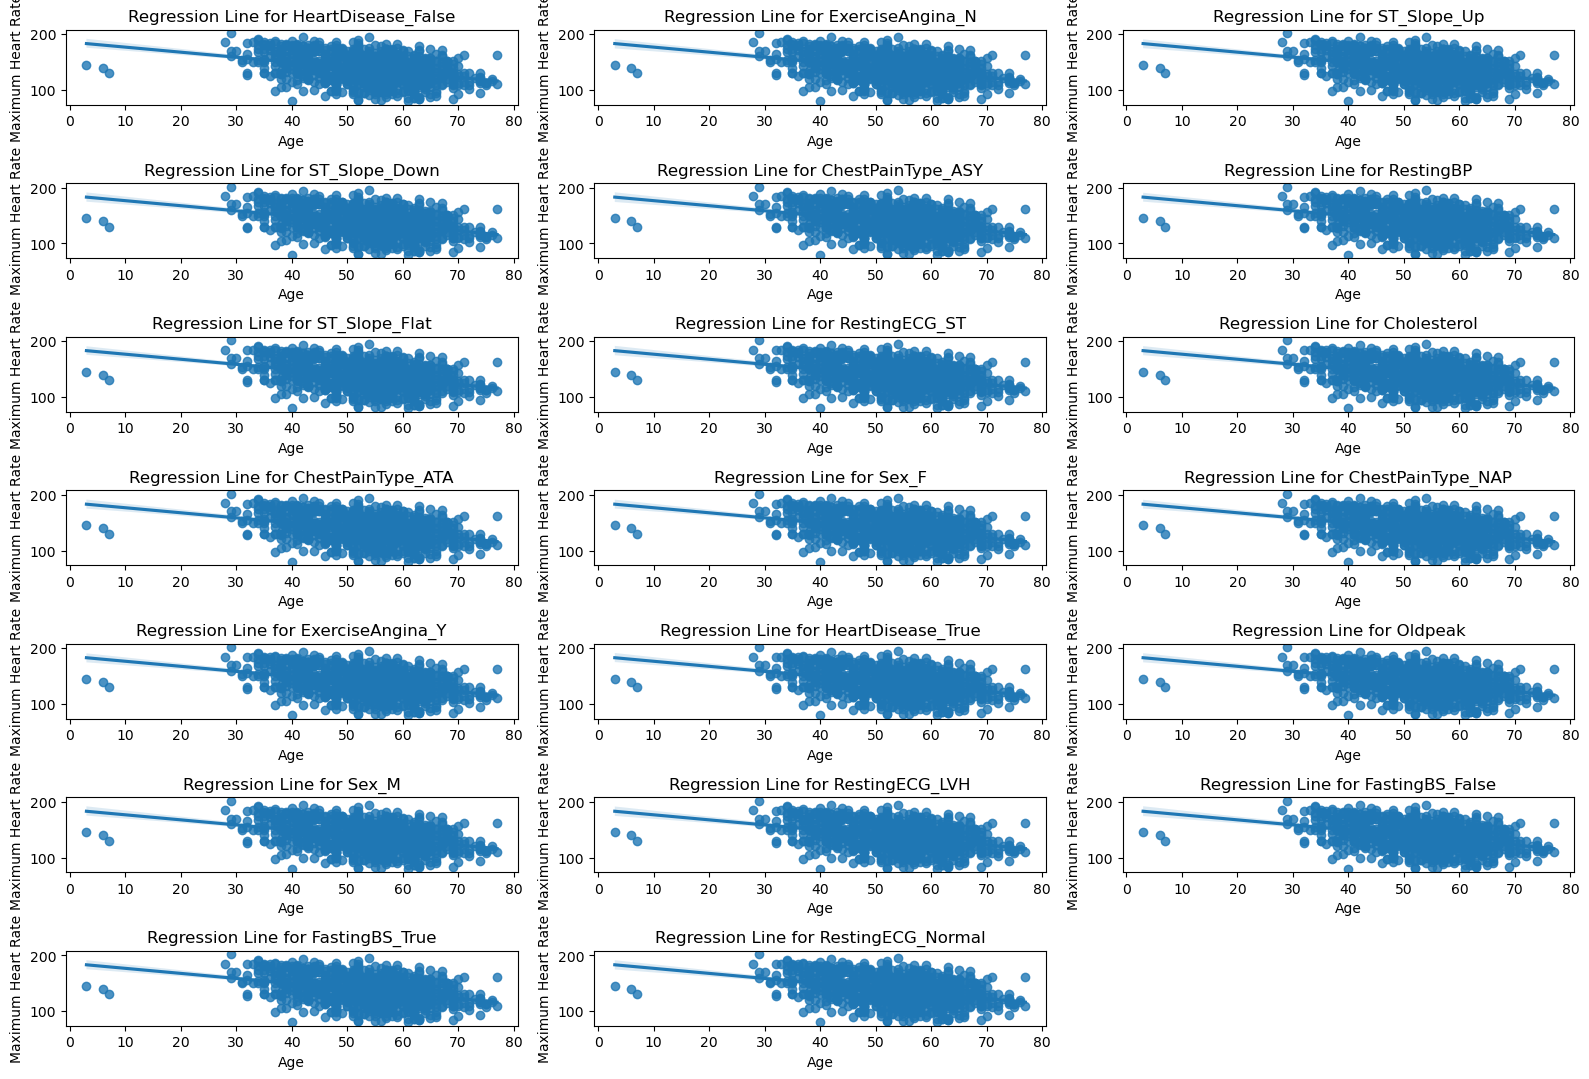

In [25]:
# Potential code for Simpson's Paradox testing
# YOUR CODE HERE

column_names = heart_df.columns.tolist()
columns_to_remove = ['MaxHR', 'Age']
confounder_variables = [col for col in column_names if col not in columns_to_remove]

plt.figure(figsize=(16, 12))

for confounder_variable in confounder_variables:
    # Filter the DataFrame based on the current confounder variable
    subset_data = heart_df[[confounder_variable, 'Age', 'MaxHR']]
    
    # Create a subplot for each confounder variable
    plt.subplot(8, 3, confounder_variables.index(confounder_variable) + 1)
    
    # Plot the regression line
    sns.regplot(x='Age', y='MaxHR', data=subset_data)
    
    # Add a title for each subplot
    plt.title(f'Regression Line for {confounder_variable}')
    plt.xlabel("Age")
    plt.ylabel("Maximum Heart Rate")

plt.tight_layout()
plt.show()

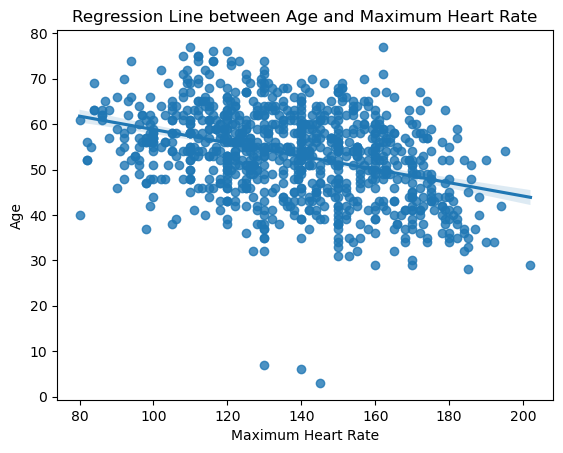

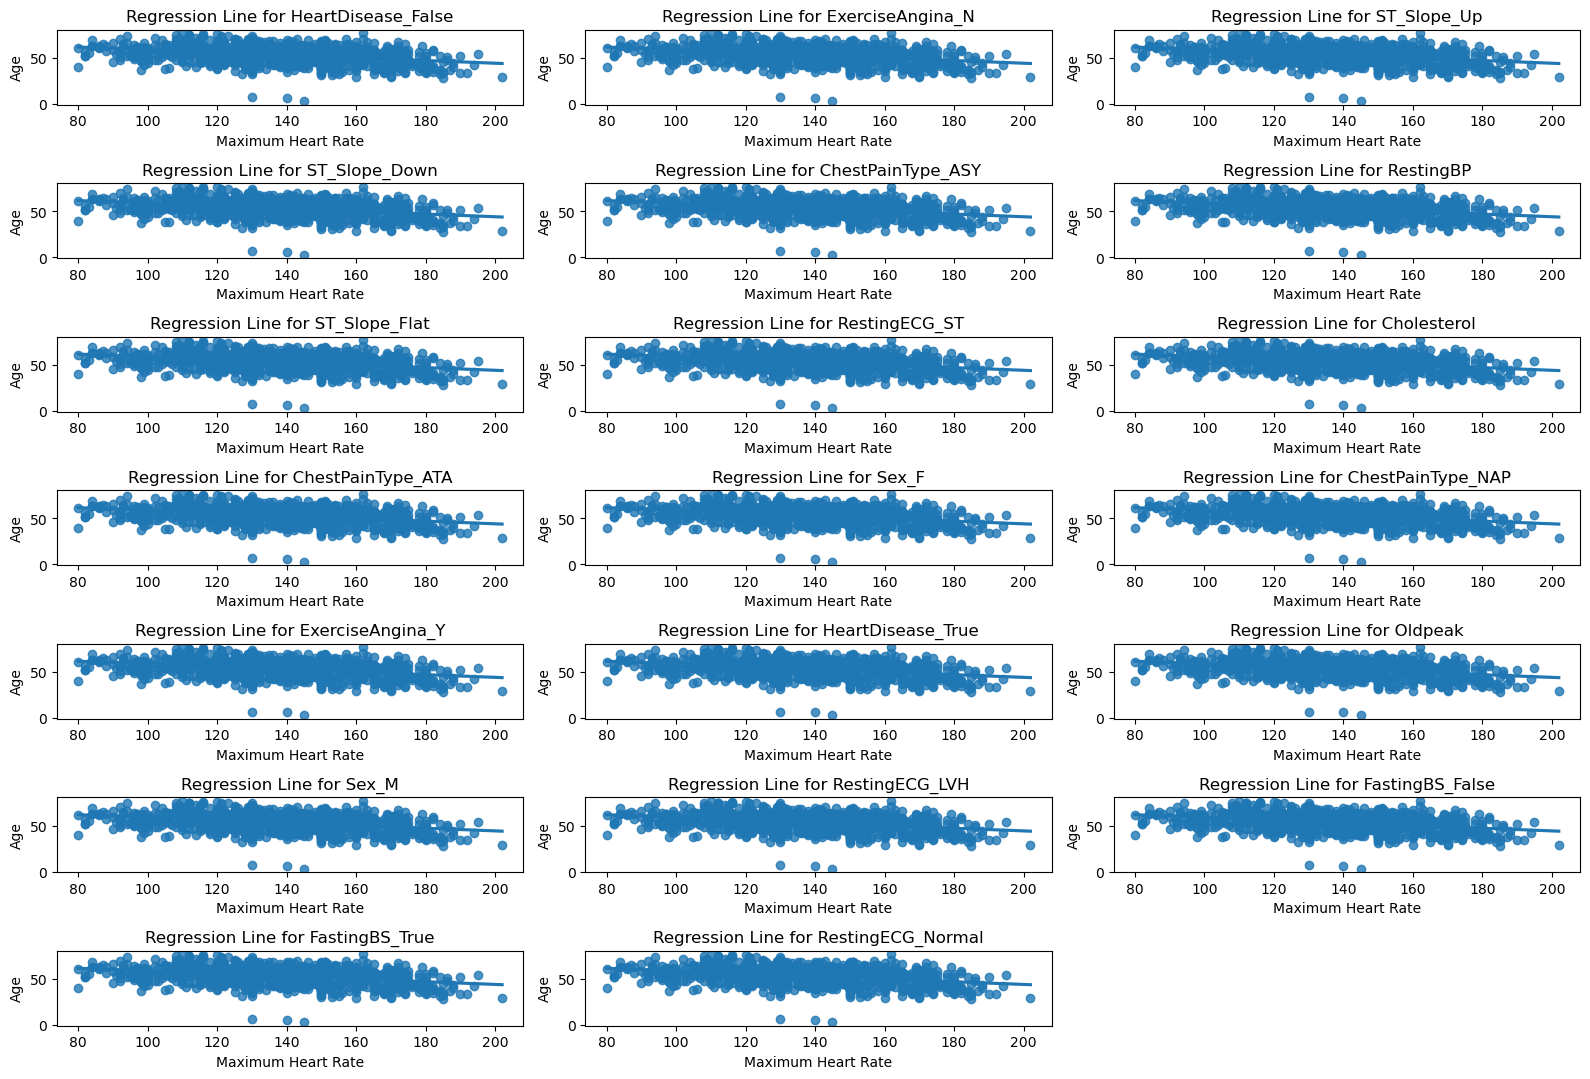

In [26]:
# Potential code for Simpson's Paradox testing
# YOUR CODE HERE
sns.regplot(x='MaxHR', y='Age', data=heart_df)
plt.title("Regression Line between Age and Maximum Heart Rate")
plt.ylabel("Age")
plt.xlabel("Maximum Heart Rate")
plt.show()

plt.figure(figsize=(16, 12))

for confounder_variable in confounder_variables:
    # Filter the DataFrame based on the current confounder variable
    subset_data = heart_df[[confounder_variable, 'Age', 'MaxHR']]
    
    # Create a subplot for each confounder variable
    plt.subplot(8, 3, confounder_variables.index(confounder_variable) + 1)
    
    # Plot the regression line
    sns.regplot(x='MaxHR', y='Age', data=subset_data)
    
    # Add a title for each subplot
    plt.title(f'Regression Line for {confounder_variable}')
    plt.ylabel("Age")
    plt.xlabel("Maximum Heart Rate")

plt.tight_layout()
plt.show()

__Student Answer:__ _your answer goes here_

According to experimental results, there is no potential for Simpson's Paradox.

### c)
In this task, we want to obtain a deeper understanding of the characteristics of each state of the former categorical or boolean features. Therefore, we create a heatmap that can be used to get a first impression of which value of which feature correlates with each other feature. 

i. Create a dataframe that contains as its columns the feature states and as its index all the column names of `heart_df`. Each entry is the sum of entries that have such a combination of features being true for the one-hot encoded features. For example, given the entries:
| ID | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|----|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1  | True          | False          | True            | False           | False           | True            | False           |
| 2  | True          | False          | False           | True            | False           | True            | False           |
| 3  | False         | True           | False           | True            | False           | True            | False           |

In this example, we would obtain the following entries as a result:

|                 | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|-----------------|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| Feature1_True   | 2             | 0              | 1               | 1               | 0               | 2               | 0               |
| Feature1_False  | 0             | 1              | 0               | 1               | 0               | 1               | 0               |
| Feature2_StateA | 1             | 0              | 1               | 0               | 0               | 1               | 0               |
| Feature2_StateB | 1             | 1              | 0               | 2               | 0               | 2               | 0               |
| Feature2_StateC | 0             | 0              | 0               | 0               | 0               | 0               | 0               |
| Feature3_StateA | 2             | 1              | 1               | 2               | 0               | 3               | 0               |
| Feature3_StateB | 0             | 0              | 0               | 0               | 0               | 0               | 0               |

In [27]:
# Creating the data for the heatmap.
# YOUR CODE HERE

# Identify and drop numerical columns
numerical_columns = heart_df.select_dtypes(include=['number']).columns
df = heart_df.drop(columns=numerical_columns)

# Sort remaining columns by prefix
sorted_columns = sorted(df.columns, key=lambda x: x.split('_')[0])
df_sorted = df[sorted_columns]

# Initialize heatmap_data
heatmap_data = pd.DataFrame(index=df_sorted.columns[1:], columns=df_sorted.columns[1:])

for column1 in df_sorted.columns[1:]:
    for column2 in df_sorted.columns[1:]:
        # Count the number of rows where both columns have True values
        count = ((df_sorted[column1] == True) & (df_sorted[column2] == True)).sum()
        
        heatmap_data.loc[column1, column2] = count

# Fill NaN values with 0
heatmap_data = heatmap_data.fillna(0).astype(int)

print(heatmap_data)

                    ChestPainType_ATA  ChestPainType_NAP  ExerciseAngina_N  \
ChestPainType_ATA                 174                  0               157   
ChestPainType_NAP                   0                201               150   
ExerciseAngina_N                  157                150               549   
ExerciseAngina_Y                   17                 51                 0   
FastingBS_False                   154                161               431   
FastingBS_True                     20                 40               118   
HeartDisease_False                149                131               357   
HeartDisease_True                  25                 70               192   
RestingECG_ST                      27                 32                87   
RestingECG_LVH                     23                 47               115   
RestingECG_Normal                 124                122               347   
ST_Slope_Up                       138                105        

/var/folders/j7/248_nty55ss6mnll47gflrz80000gn/T/ipykernel_7345/26457333.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.fillna(0).astype(int)


ii. Next, create the heatmap based on the data from the last subtask. If necessary, improve readability of the visualization.

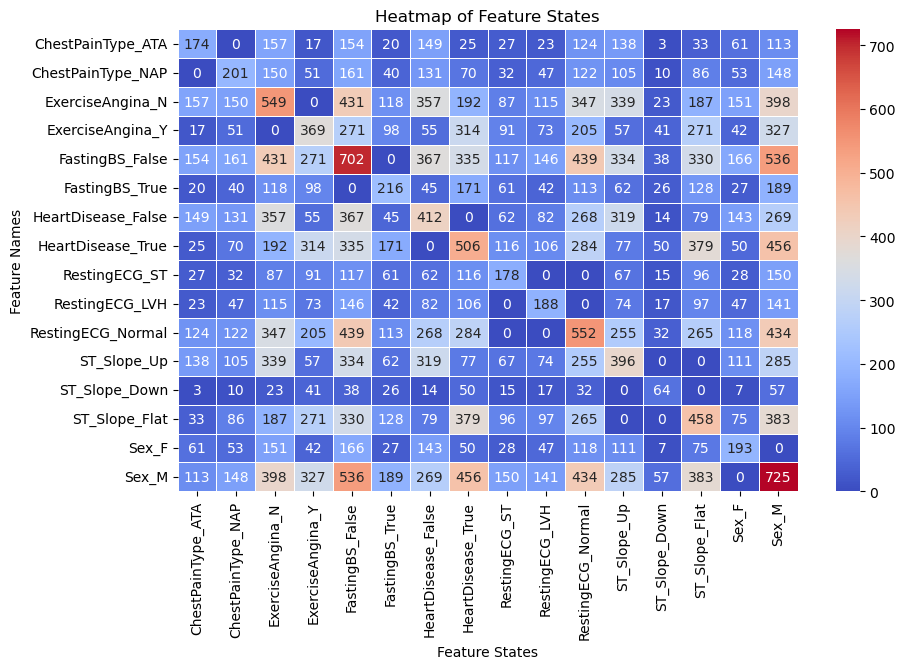

In [28]:
# Visualizing the obtained heatmap
# YOUR CODE HERE

plt.figure(figsize=(10, 6)) 
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt='d')

plt.xlabel('Feature States')
plt.ylabel('Feature Names')
plt.title('Heatmap of Feature States')

plt.show()

Given the heatmap, briefly derive some insights towards the different values of a feature. I.e., you may choose a heart disease being present or not and argue about what correlates for the other features for each value.

__Student Answer:__ _your answer goes here_

1. **FFastingBS**:
   - For patients with heart disease ("HeartDisease_True"), there seems to be a higher number of cases where fasting blood sugar is true (FastingBS_True) compared to those without heart disease. This suggests a potential correlation where patients with heart disease are more likely to have elevated fasting blood sugar levels.

2. **EExerciseAngina**:
   - "ExerciseAngina_Y" (Yes) has a higher count with heart disease, suggesting that patients with heart disease are more likely to experience angina (chest pain) during exercise.

3. **RestingECG**:
   - The "RestingECG_Normal" feature has a high count for both those with and without heart disease, but it's notably higher for those without heart disease, which is an expected finding since a normal ECG is generally a sign of a healthy heart.
   - "RestingECG_LVH" (left ventricular hypertrophy) is more common in patients with heart disease, which aligns with medical knowledge since LVH can be a response to increased work by the heart.

4. **ST_Slope**:
   - The "ST_Slope_Flat" and "ST_Slope_Down" are more commonly associated with "HeartDisease_True". In clinical practice, these ECG changes can indicate heart disease, particularly ischemic conditions.

5. **Sex**:
   - The feature "Sex_M" (male) has a higher association with heart disease, which might reflect the known higher prevalence of certain types of heart disease in males.

6. **Chest Pain Type**:
   - "ChestPainType_ASY" (asymptomatic) has a higher count with heart disease present. This is interesting because one might expect symptomatic chest pain to be more associated with heart disease. However, this could indicate that many patients with heart disease do not experience typical symptoms, or it could reflect a certain type of heart condition that is asymptomatic.